# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn-pastel')
import warnings
warnings.filterwarnings('ignore')


Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [11]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
date = pd.date_range(start='1-01-2017', end='3-31-2018', freq='D')
len(date)

455

In [12]:
# store the parameters
mu = 5
y_0 = 8
phi = 0.7

error = np.random.normal(loc=0, scale=2, size=455)

In [13]:
# generate the time series according to the formula

data = [None] * 455
y = y_0
for i, row in enumerate(date):
    data[i] = mu + y + error[i]
    y = data[i] - mu

#

Plot the time series and verify what you see

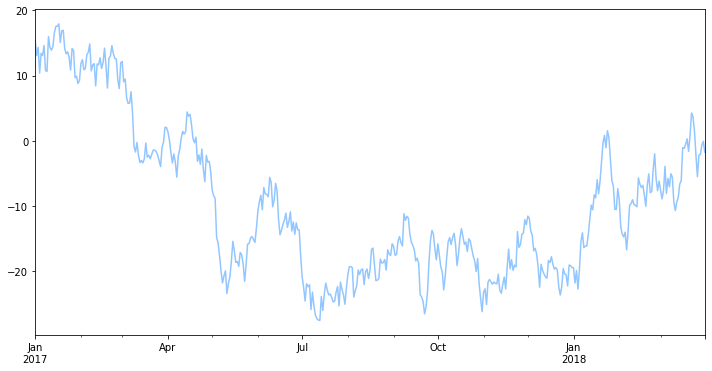

In [14]:
ts = pd.Series(data=data, index=date)

ts.plot(figsize=(12,6))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

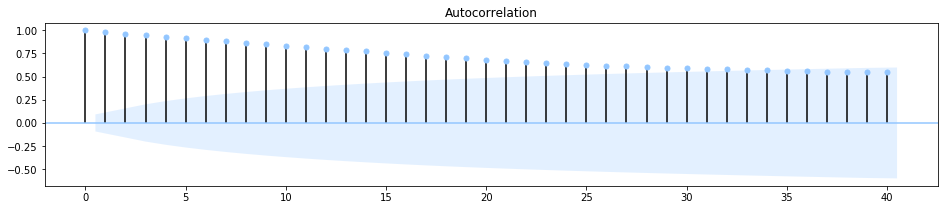

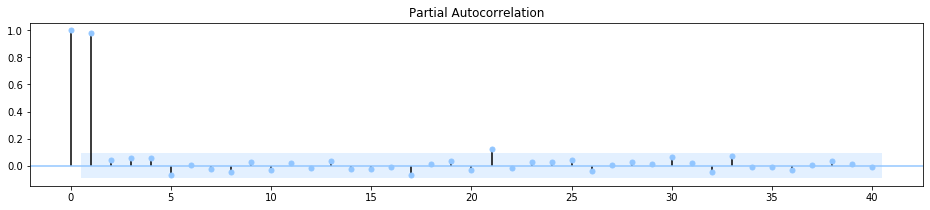

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts, ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [18]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -966.474
Method:                       css-mle   S.D. of innovations              2.016
Date:                Thu, 09 Jan 2020   AIC                           1938.948
Time:                        19:09:31   BIC                           1951.309
Sample:                    01-01-2017   HQIC                          1943.817
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3411      6.853     -0.779      0.436     -18.772       8.090
ar.L1.y        0.9877      0.007    136.395      0.000       0.973       1.002
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [19]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
date = pd.date_range(start='4-01-2015', end='8-30-2015', freq='D')

# store the parameters
mu = 7
theta = 0.9

#generate the time series
TS = [None] * len(date)
prev_err = error[0]
for i, row in enumerate(date):
    TS[i] = mu + theta + prev_err + error[i]
    prev_err = error[i]

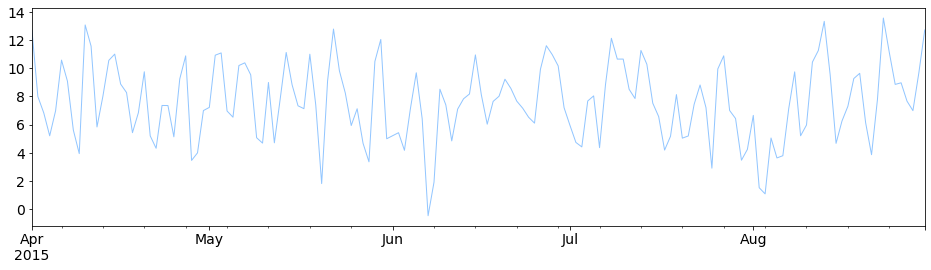

In [23]:
# Plot the time series
ts = pd.Series(data=TS, index=date)
ts.plot(figsize=(16,4), linewidth=1, fontsize=14)

## Look at the ACF and PACF of your model and write down your conclusions

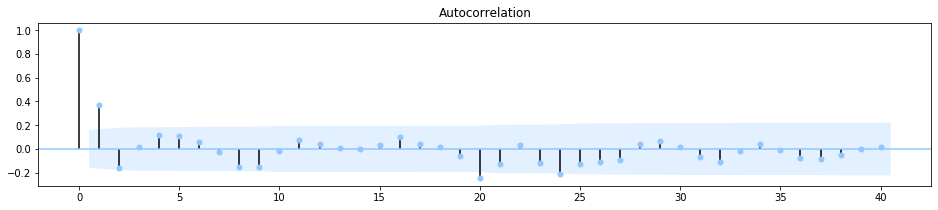

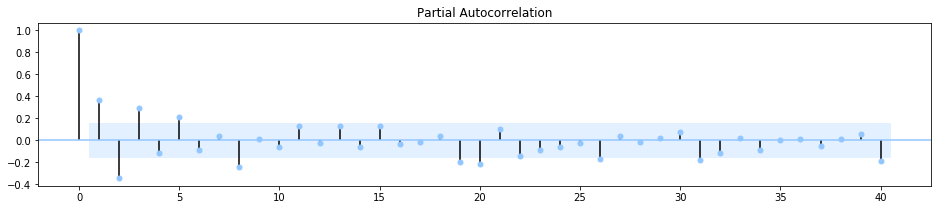

In [24]:
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts, ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [25]:
# Fit an AR(1) model to the first simulated data

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# print(res_arma.params)



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  152
Model:                     ARMA(0, 1)   Log Likelihood                -326.055
Method:                       css-mle   S.D. of innovations              2.038
Date:                Thu, 09 Jan 2020   AIC                            658.109
Time:                        19:20:57   BIC                            667.181
Sample:                    04-01-2015   HQIC                           661.795
                         - 08-30-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6216      0.329     23.191      0.000       6.977       8.266
ma.L1.y        0.9948      0.048     20.717      0.000       0.901       1.089
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [32]:
# the data is in "winning_400m.csv"
data = pd.read_csv('winning_400m.csv')
# data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
year             22 non-null datetime64[ns]
winning_times    22 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 480.0 bytes


In [33]:
data.head()

,year,winning_times
0,1900-01-01,49.4
1,1904-01-01,49.2
2,1908-01-01,50.0
3,1912-01-01,48.2
4,1920-01-01,49.6


In [34]:
data.set_index('year', inplace=True)
data.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

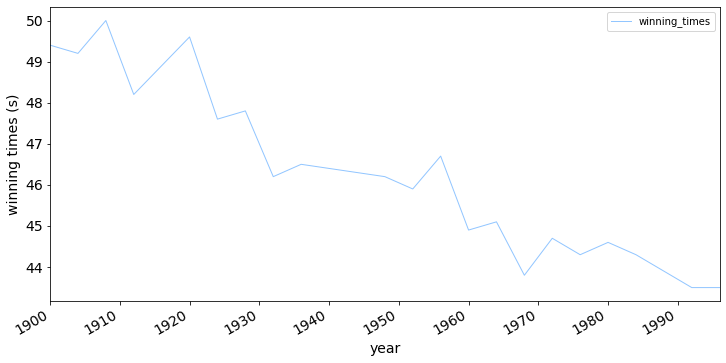

In [38]:
data.plot(figsize=(12,6), linewidth=1, fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('winning times (s)', fontsize=14);

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [39]:
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3
1948-01-01,-0.3


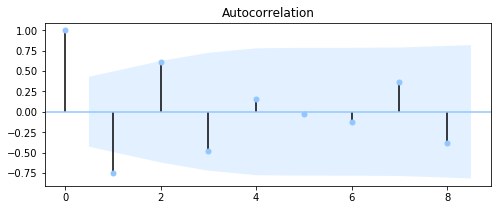

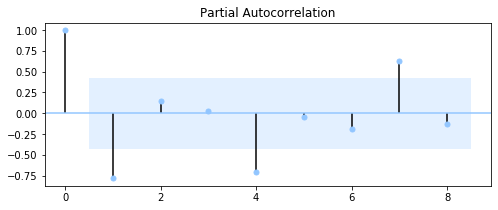

In [40]:
# Look at ACF and PACF
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8,3))
plot_acf(data_diff, ax=ax, lags=8);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [41]:
# Import the ARMA module from statsmodels
# from statsmodels.tsa.arima_model import ARMA
# import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Thu, 09 Jan 2020   AIC                             47.911
Time:                        19:32:26   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_ti

In [42]:
# Try another one
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 09 Jan 2020   AIC                             44.943
Time:                        19:32:52   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

In [43]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(data_diff, order=(1,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Thu, 09 Jan 2020   AIC                             47.916
Time:                        19:33:26   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.004      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_ti

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.